# Project 1
# Conversion rate

In [44]:
#for loading data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'figure.autolayout': True})
import numpy as np
# for building model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# for simple decision tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

1. Load Data

In [45]:
data = pd.read_csv('P:\Code\PycharmProject\project_data\conversion_project.csv')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [47]:
data.head(100)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
95,US,26,1,Seo,4,0
96,US,20,1,Seo,3,0
97,US,31,1,Seo,11,0
98,US,27,1,Seo,2,0


In [48]:
#data statistical summary
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [49]:
country_dis = data.groupby(['country']).size()

In [50]:
source_dis = data.groupby(['source']).size()

In [51]:
age_dis = data.groupby(['age']).size()

In [52]:
# data grouped by age
age_dis

age
17      7597
18      8466
19      9349
20     10156
21     10966
22     11701
23     12336
24     12960
25     13460
26     13931
27     14084
28     14341
29     14158
30     14346
31     13692
32     13507
33     12631
34     12108
35     11471
36     10779
37      9761
38      8970
39      8202
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
72         1
73         1
77         1
79         1
111        1
123        1
dtype: int64

In [53]:
# check abnormal age data
data[data['age']>90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [54]:
#remove the abnormal data from our data set
data = data[data['age']< 90]
age_dis = data.groupby(['age']).size()
source_dis = data.groupby(['source']).size()
country_dis = data.groupby(['country']).size()
conversion_dis = data.groupby(['converted']).size()

In [55]:
conversion_dis

converted
0    306000
1     10198
dtype: int64

In [56]:
age_dis

age
17     7597
18     8466
19     9349
20    10156
21    10966
22    11701
23    12336
24    12960
25    13460
26    13931
27    14084
28    14341
29    14158
30    14346
31    13692
32    13507
33    12631
34    12108
35    11471
36    10779
37     9761
38     8970
39     8202
40     7148
41     6401
42     5588
43     4904
44     4224
45     3634
46     2994
47     2504
48     2121
49     1629
50     1356
51     1093
52      935
53      627
54      520
55      394
56      286
57      247
58      165
59      127
60       94
61       71
62       59
63       35
64       27
65       15
66        9
67        5
68        5
69        3
70        2
72        1
73        1
77        1
79        1
dtype: int64

most of the data is collected from age 20- 36

In [57]:
country_dis

country
China       76602
Germany     13055
UK          48449
US         178092
dtype: int64

In [58]:
source_dis

source
Ads        88739
Direct     72420
Seo       155039
dtype: int64

In [59]:
# average of the data grouped by country
data.groupby(['country']).mean()

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.442895,0.677288,5.189966,0.062428
UK,30.449875,0.679849,5.082066,0.052612
US,30.566482,0.681985,4.930160,0.037801


<AxesSubplot:xlabel='country'>

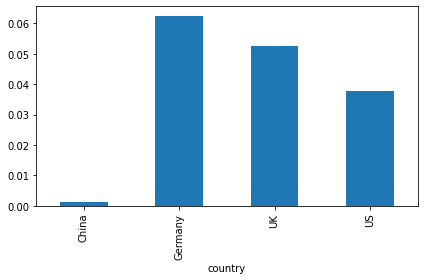

In [60]:
data.groupby(['country'])['converted'].mean().plot.bar()

the convert in China is the lowest and convert in Germany is the highest.

<AxesSubplot:xlabel='age'>

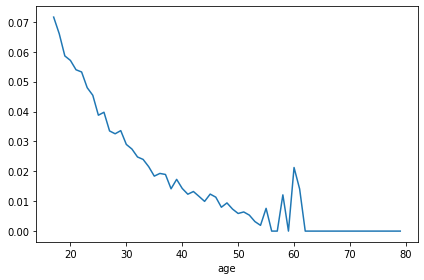

In [61]:
data.groupby(['age'])['converted'].mean().plot()

Conversion success tends to be concentrated in younger age groups and is highest at age 17 and decreases accordingly as age increases.

<AxesSubplot:xlabel='source'>

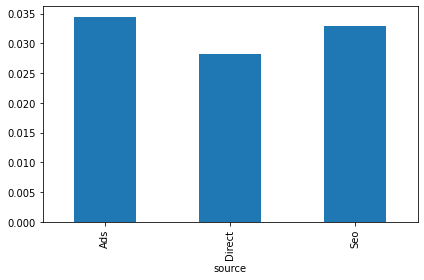

In [62]:
data.groupby(['source'])['converted'].mean().plot.bar()

Advertising accounted for the most conversions and the second highest number of conversions from web searches to the site.

<AxesSubplot:xlabel='total_pages_visited'>

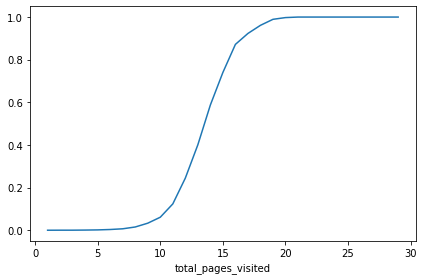

In [63]:
data.groupby(['total_pages_visited'])['converted'].mean().plot()

More pages viewed tend to have more conversions

2. Build model

In [64]:
# set up dummy variables
data_dum = pd.get_dummies(data, drop_first= True)
data_dum

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,1,0,0
316196,27,1,6,0,0,0,1,1,0
316197,25,0,4,0,0,0,0,0,0
316198,22,0,4,0,0,0,1,0,1


In [65]:
np.random.seed(1000)
# split data into train and test set
train,test = train_test_split(data_dum,test_size= 0.34)

In [66]:
# main model
rf = RandomForestClassifier(n_estimators= 100 ,max_features=3, oob_score= True)
rf.fit(train.drop('converted',axis = 1),train['converted'])

RandomForestClassifier(max_features=3, oob_score=True)

In [67]:
# OOB accuracy
rf.oob_score_

0.9845512482629738

In [68]:
# OOB confusion matrix
pd.DataFrame(confusion_matrix(train['converted'],rf.oob_decision_function_[:,1].round(),labels = [0,1]))

,0,1
0,200933,1054
1,2170,4533


In [69]:
# test accuracy
rf.score(test.drop('converted',axis = 1), test['converted'])

0.9842337314432414

In [70]:
#test confusion matrix

pd.DataFrame(confusion_matrix(test['converted'],rf.predict(test.drop('converted',axis = 1)),labels = [0,1]))

,0,1
0,103455,558
1,1137,2358


the OOB accuracy and test accuracy are very similar and both are about 98.4%.


3.Variable importance

In [71]:
var_importance = pd.Series(rf.feature_importances_,index = train.drop('converted',axis = 1).columns)

In [72]:
var_importance

age                    0.115799
new_user               0.041044
total_pages_visited    0.789610
country_Germany        0.011029
country_UK             0.011871
country_US             0.014406
source_Direct          0.007389
source_Seo             0.008851
dtype: float64

<AxesSubplot:>

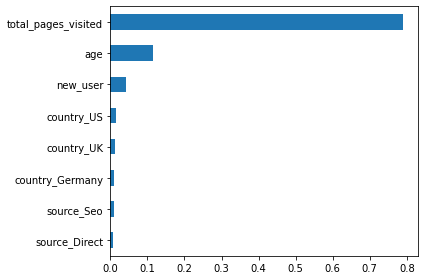

In [73]:
var_importance.sort_values().plot(kind ='barh')

We can see 'total pages visited' plays the most important role for the conversion rate. In other words, if we can make the users to visit more pages, we could have a higher conversion rate.

However, this influence does not come from the customer's own characteristics, but depends on whether the web content can attract the customer. So I am going to take away the variable 'total pages visited' from the model and look at the importance of the remaining variables.

4. Adjusted Model without the pages visited

In [74]:
# new model without 'total pages visited'

rf2 = RandomForestClassifier(n_estimators= 100, max_features=3,oob_score= True, class_weight= {0:1,1:10})

In [75]:
rf2.fit(train.drop(['converted','total_pages_visited'], axis = 1),train['converted'])

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_features=3,
                       oob_score=True)

In [76]:
# OOB accuracy

rf2.oob_score_

0.8954094590061814

In [77]:
# OOB Confusion Matrix

pd.DataFrame(confusion_matrix(train['converted'],rf2.oob_decision_function_[:,1].round(),labels = [0,1]))

,0,1
0,183928,18059
1,3768,2935


In [78]:
# test accuracy
rf2.score(test.drop(['converted','total_pages_visited'], axis =1),test['converted'])

0.8960356438590616

In [79]:
#test confusion matrix

pd.DataFrame(confusion_matrix(test['converted'],rf2.predict(test.drop(['converted','total_pages_visited'], axis = 1)),labels=[0,1]))

,0,1
0,94870,9143
1,2034,1461


After I remove the total pages visited from our model, the accuracy is decreased to 89%, which is still reasonable and acceptable. The model is still good to use.

In [80]:
# importance layout after the adjustment

var_importance2 = pd.Series(rf2.feature_importances_,index=train.drop(['converted','total_pages_visited'],axis =1).columns)
var_importance2

age                0.251078
new_user           0.448870
country_Germany    0.080511
country_UK         0.088965
country_US         0.114240
source_Direct      0.009893
source_Seo         0.006443
dtype: float64

<AxesSubplot:>

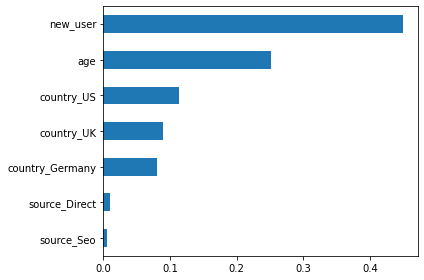

In [81]:
var_importance2.sort_values().plot(kind = 'barh')

<AxesSubplot:>

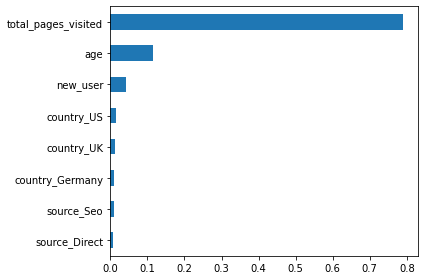

In [82]:
var_importance.sort_values().plot(kind = 'barh')

After the adjustment, the 'new user' variable plays the most important role and age still plays the second important role. So we can tell new users are very critical for the conversion rate.

By comparing the two model results, we can see source related variables do not affect the conversion rate too much.

5. Check by using simple decision tree

In [83]:
tree = DecisionTreeClassifier( max_depth=2,class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
tree.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])


DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=2,
                       min_impurity_decrease=0.001)

In [84]:
export_graphviz(tree, out_file="tree_conversion.dot", feature_names=train.drop(['converted', 'total_pages_visited'], axis=1).columns, proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()

In [85]:
tu_ = Source.from_file("tree_conversion.dot")
tu_.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Conclusion

1. Germany has the highest conversion rate, but also has the smallest amount of visits. So in the future, we should do more marketing in Germany as the potential market of the site is very large.
2. Our site tend to attract more young people.So we should focus more on the young age population.
3. New user tends to have higher conversion rate. So we could offer more old user promotion to bring back our old users.
4. Chinese version of the site seems to have large problem, as the conversion rate in China is very low. We may need to check if the site had some translation error or culture issue which could cause the low rate in China region.